In [47]:
import pandas as pd
import numpy as np

df = pd.read_csv("./csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

def fix_year(column_name):
    if column_name.endswith("-20"):
        return column_name[:-2] + "2020"
    elif column_name.endswith("-21"):
        return column_name[:-2] + "2021"
    elif column_name.endswith("-22"):
        return column_name[:-2] + "2022"
    elif column_name.endswith("-23"):
        return column_name[:-2] + "2023"
    else:
        return column_name

# Apply the function to all column names
df = df.rename(columns=fix_year)
print(df)

#df.to_csv("./csse_covid_19_time_series/time_series_covid19_confirmed_global.csv", index=False)


# Select rows where the Country/Region column equals "US"
us_df = df[df["Country/Region"] == "US"]

# Remove the first four columns
us_df = us_df.iloc[:, 4:]

# Transpose the dataframe
us_df = us_df.transpose()

df_us = us_df

df_us = df_us.rename(columns={df_us.columns[0]: 'Confirmed cases'})


# add a column for dates
df_us = df_us.reset_index()
df_us = df_us.rename(columns={'index': 'Date'})

df_us['Date'] = pd.to_datetime(df_us['Date'], format='%m-%d-%Y')

print(df_us)

    Province/State        Country/Region        Lat        Long  1-22-2020  \
0              NaN           Afghanistan  33.939110   67.709953          0   
1              NaN               Albania  41.153300   20.168300          0   
2              NaN               Algeria  28.033900    1.659600          0   
3              NaN               Andorra  42.506300    1.521800          0   
4              NaN                Angola -11.202700   17.873900          0   
..             ...                   ...        ...         ...        ...   
284            NaN    West Bank and Gaza  31.952200   35.233200          0   
285            NaN  Winter Olympics 2022  39.904200  116.407400          0   
286            NaN                 Yemen  15.552727   48.516388          0   
287            NaN                Zambia -13.133897   27.849332          0   
288            NaN              Zimbabwe -19.015438   29.154857          0   

     1-23-2020  1-24-2020  1-25-2020  1-26-2020  1-27-2020  ...

In [49]:
# read in the second dataset
df_us_deaths = pd.read_csv('./csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

df_us_deaths = df_us_deaths.rename(columns=fix_year)

print(df_us_deaths)

# select rows where country is US
df_us_deaths = df_us_deaths[df_us_deaths['Country/Region'] == 'US']

# drop the first four columns
df_us_deaths = df_us_deaths.iloc[:, 4:]

# transpose the dataframe
df_us_deaths = df_us_deaths.transpose()

# set the column names
df_us_deaths.columns = ['Deaths']

# add a column for dates
df_us_deaths = df_us_deaths.reset_index()
df_us_deaths = df_us_deaths.rename(columns={'index': 'Date'})

df_us_deaths = df_us_deaths.drop('Date', axis=1)
print(df_us_deaths)


# add the Deaths column to the previous dataframe
df_us = pd.concat([df_us, df_us_deaths], axis=1)
print(df_us)

    Province/State        Country/Region        Lat        Long  1-22-2020  \
0              NaN           Afghanistan  33.939110   67.709953          0   
1              NaN               Albania  41.153300   20.168300          0   
2              NaN               Algeria  28.033900    1.659600          0   
3              NaN               Andorra  42.506300    1.521800          0   
4              NaN                Angola -11.202700   17.873900          0   
..             ...                   ...        ...         ...        ...   
284            NaN    West Bank and Gaza  31.952200   35.233200          0   
285            NaN  Winter Olympics 2022  39.904200  116.407400          0   
286            NaN                 Yemen  15.552727   48.516388          0   
287            NaN                Zambia -13.133897   27.849332          0   
288            NaN              Zimbabwe -19.015438   29.154857          0   

     1-23-2020  1-24-2020  1-25-2020  1-26-2020  1-27-2020  ...

In [53]:
import pandas as pd

# Load the DataFrame from a CSV file
df = pd.read_csv('s_and_p.csv')

# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Set the Date column as the index
df = df.set_index('Date')

# Extract the data between the dates '22-01-2020' and '09-03-2023'
df = df.loc['2020-01-22':'2023-03-09']

print(df)

#df_us['Date'] = pd.to_datetime(df_us['Date'], format='%m-%d-%Y')
#df_covid_stocks = df_us.drop('Date', axis = 1)

#df['date'] = df['date'].apply(lambda x: datetime.strftime(x, '%Y-%m-%d'))

#df_covid_stocks =pd.concat([df, df_covid_stocks], axis=1)

df_covid_stocks = pd.merge(df, df_us, on='Date', how='inner')

print(df_covid_stocks)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-01-22  3330.020020  3337.770020  3320.040039  3321.750000  3321.750000   
2020-01-23  3315.770020  3326.879883  3301.870117  3325.540039  3325.540039   
2020-01-24  3333.100098  3333.179932  3281.530029  3295.469971  3295.469971   
2020-01-27  3247.159912  3258.850098  3234.500000  3243.629883  3243.629883   
2020-01-28  3255.350098  3285.780029  3253.219971  3276.239990  3276.239990   
...                 ...          ...          ...          ...          ...   
2023-03-03  3998.020020  4048.290039  3995.169922  4045.639893  4045.639893   
2023-03-06  4055.149902  4078.489990  4044.610107  4048.419922  4048.419922   
2023-03-07  4048.260010  4050.000000  3980.310059  3986.370117  3986.370117   
2023-03-08  3987.550049  4000.409912  3969.760010  3992.010010  3992.010010   
2023-03-09  3998.659912  4017.810059  3908.699951  3

In [1]:



def format_date(input_str):
    if "-" in input_str:
        input_str = input_str.replace("-", "/")
        input_str=input_str[:-4]+input_str[-2:]
        return input_str
    else:
        return input_str
import pandas as pd
df = pd.read_csv("ds_covid.csv")
df_transposed = df.transpose()
df_transposed = df_transposed.reset_index(drop=False)
df_transposed = df_transposed.rename(columns={'index': 'Date'})
df_transposed['Date'] = df_transposed['Date'].apply(lambda x: format_date(x))



In [2]:
import matplotlib.pyplot as plt
print(df_transposed.head())

         Date        0        1        2        3        4        5        6  \
0  Unnamed: 0  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20   
1   Confirmed      1.0      1.0      2.0      2.0      5.0      5.0      5.0   
2      Deaths      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3   Recovered      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

         7        8  ...         1136         1137         1138         1139  \
0  1/29/20  1/30/20  ...   03-03-2023   03-04-2023   03-05-2023   03-06-2023   
1      6.0      6.0  ...  103648690.0  103650837.0  103646975.0  103655539.0   
2      0.0      0.0  ...    1122165.0    1122172.0    1122134.0    1122181.0   
3      0.0      0.0  ...          0.0          0.0          0.0          0.0   

          1140         1141         1142           1143           1144  \
0   03-07-2023   03-08-2023   03-09-2023  Unnamed: 1144  Unnamed: 1145   
1  103690910.0  103755771.0  103802702.0          

In [3]:
print(df_transposed.shape)

(4, 1147)


In [4]:
print(df_transposed.describe())

              Date    0    1    2    3    4    5    6    7    8  ...  \
count            4  4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0  ...   
unique           4  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  ...   
top     Unnamed: 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
freq             1  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  ...   

              1136        1137        1138        1139        1140  \
count            4           4           4           4           4   
unique           4           4           4           4           4   
top     03-03-2023  03-04-2023  03-05-2023  03-06-2023  03-07-2023   
freq             1           1           1           1           1   

              1141        1142           1143           1144           1145  
count            4           4              1              1              1  
unique           4           4              1              1              1  
top     03-08-2023  03-09-2023  Unnamed: 1144  Unnamed

In [5]:
print(df_transposed.isnull().sum())

Date    0
0       0
1       0
2       0
3       0
       ..
1141    0
1142    0
1143    3
1144    3
1145    3
Length: 1147, dtype: int64


In [6]:
df_transposed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Columns: 1147 entries, Date to 1145
dtypes: object(1147)
memory usage: 36.0+ KB


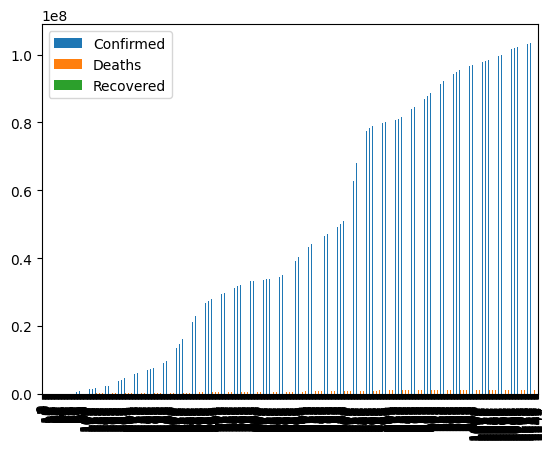

In [7]:
ax = df.plot.bar()
plt.show()

In [8]:
df_transposed.describe(percentiles = [.20, .40, .60, .80], include = ['object', 'float', 'int'])

,Date,0,1,2,3,4,5,6,7,8,...,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145
count,4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4,4,4,4,4,4,4,1,1,1
unique,4,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,4,4,4,4,4,4,4,1,1,1
top,Unnamed: 0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,03-03-2023,03-04-2023,03-05-2023,03-06-2023,03-07-2023,03-08-2023,03-09-2023,Unnamed: 1144,Unnamed: 1145,Unnamed: 1146
freq,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1,1,1,1,1,1,1,1,1,1


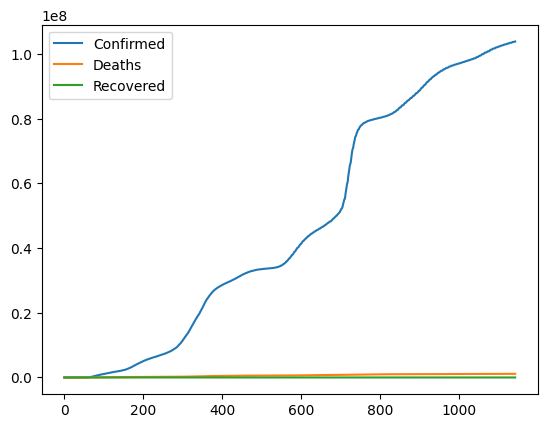

In [10]:
ax = df.plot(kind='line')